# Think, Pair, Share

I am providing you with a current reserach article. This is an article focused on understanding **Parkinson's disease.** he article is coming from one of the leading labs in the world focues on the study of gait, J Hausdorff. 

Please read the highlighted parts, discuss what you read with a partner, then share your impressions with the class.

I am providing you a set of data collected from me walking around my house which should help you understand the article.


# Prepare your COLAB workspace by loading the needed libraries.
Run this block just once at the beginning

In [1]:

# Prepare the packages that we will use
# When you import packages you can rename them, which makes for less typing
import pandas as pd
import os
import io
import numpy as np
# Or if you do not need the entire package you can import just some pieces of it
import matplotlib.pyplot as plot
from scipy import signal
from plotly.graph_objs import Figure, FigureWidget, Layout, Scatter
from plotly.offline import init_notebook_mode, iplot
plot.rcParams['figure.figsize'] = [14, 5]
init_notebook_mode(connected=True)

# Load your data

In [0]:

DataFileURL = 'https://raw.githubusercontent.com/NCMlab/HealthSignalsClass/master/ActDataFile012.csv'
df1 = pd.read_csv(DataFileURL)
# Dataset is now stored in a Pandas Dataframe

# Look at your data
* What data is collected?
* What are the units?
* What is the sampling frequency?

In [3]:
df1.head()

,Time (s),X (m/s2),Y (m/s2),Z (m/s2)
0,0.000000,0.418334,-14.655024,-2.960852
1,0.019853,-1.906225,-11.130864,-0.053774
2,0.039706,-1.858015,-11.237109,-0.319568
3,0.059558,-1.448511,-10.177952,0.456316
4,0.079411,-1.228369,-9.996664,-0.043086


# Plot the data

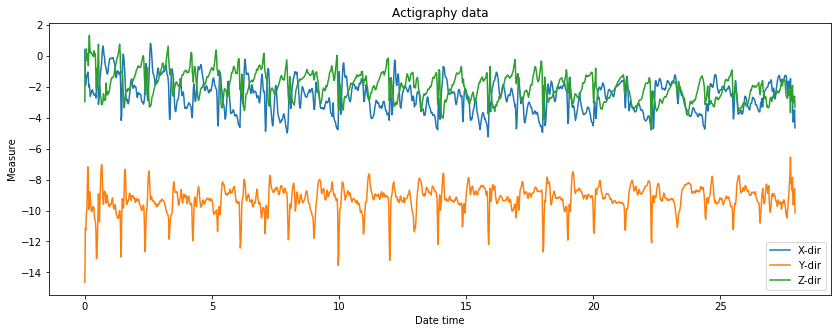

In [4]:
plot.plot(df1['Time (s)'], df1[' X (m/s2)'],label='X-dir')
plot.plot(df1['Time (s)'], df1[' Y (m/s2)'],label='Y-dir')
plot.plot(df1['Time (s)'], df1[' Z (m/s2)'],label='Z-dir')
plot.title("Actigraphy data")
plot.xlabel("Date time")
plot.ylabel("Measure")
plot.legend()
plot.show() 

# Can you figure out what direction the sensor was placed?
* Was it right side up? Upside down?

# The paper only used the Z direction, so lets plot only that.

Modify the following code so only the Z direction is plotted.

Does the data need a MEDIAN filter applied to it?


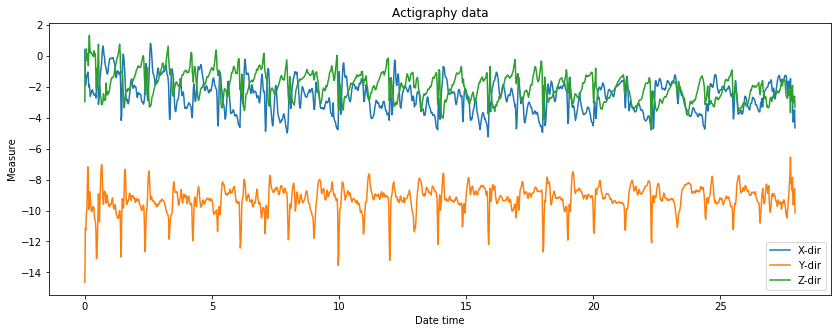

In [5]:
plot.plot(df1['Time (s)'], df1[' X (m/s2)'],label='X-dir')
plot.plot(df1['Time (s)'], df1[' Y (m/s2)'],label='Y-dir')
plot.plot(df1['Time (s)'], df1[' Z (m/s2)'],label='Z-dir')
plot.title("Actigraphy data")
plot.xlabel("Date time")
plot.ylabel("Measure")
plot.legend()
plot.show() 

# Look at the frequency domain
## What is the sampling frequency?
# Change the first line so that it is correct




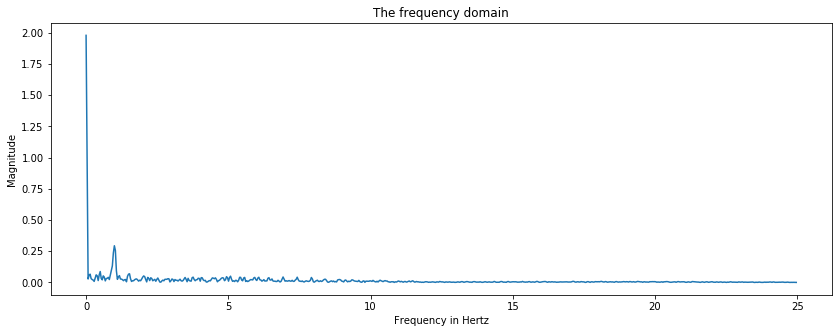

In [8]:
SamplingFrequency = 50  # <<< CHANGE THIS AS PER THE DATA

NumberOfSamples = len(df1[' Z (m/s2)'])
# What is the resolution in the frequency domain
fres = SamplingFrequency/NumberOfSamples
# What frequencies can be measured? This is related to the sampling frequency
freq = np.arange(0, SamplingFrequency, fres)
# Make a window for use with the FFT
w = np.hanning(NumberOfSamples)

# Use the FFT algorithm to convert the time signal to its frequency domain representation
F = np.fft.fft(w*df1[' Z (m/s2)'])
# Square the result of the FFT algorithm to calculate Power
Fpower = 2*np.abs(F)/(NumberOfSamples)
# Plot the frequency domain 
FreqLength = int(NumberOfSamples/2)
plot.plot(freq[np.arange(0,FreqLength)], Fpower[np.arange(0,FreqLength)])
plot.xlabel('Frequency in Hertz')
plot.ylabel('Magnitude')
plot.title('The frequency domain')
plot.show()

# Guess my walking speed

To make this easier Zoom in on the plot using the following bit of code. Set the Min and Max frequencies to plot based on the values set inthe paper.

The first big spike in the data is the DOMINANT frequency and you can assume is my walking pace.  Use the frequency value of this spike to figure out the steps per minute that I make. How many steps in one hour?

If each of MY steps is one meter, how fast in kilometers per hour am I walking? Does this number make sense? 

The paper collected data on the amplitude, width and slope. What are these values?

It may help to know that the distance between the dots in the TIME DOMAIN plot is set by the sampling frequency. With a sampling frequency of 100 Hz, the time between points is 0.01 seconds (1/sampling-frequncy). In the frequency domain the same time between dots is the (sampling frequency)/(Number of samples).





Space between points is 0.04Hz


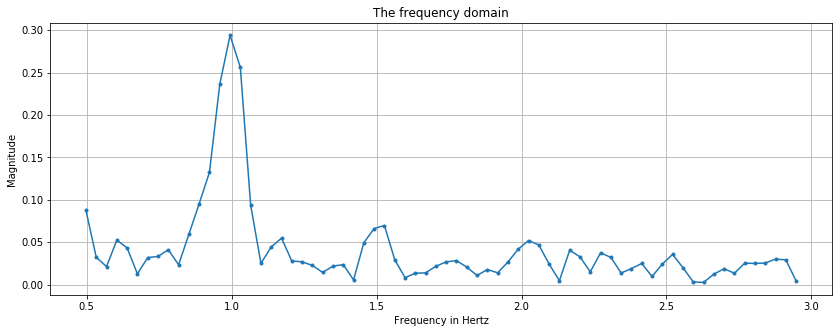

In [9]:
MinFrequencyToPlot = 0.5 # <<< CHANGE THIS AS PER THE PAPER
MaxFrequencyToPlot = 3 # <<< CHANGE THIS AS PER THE PAPER

print('Space between points is %0.2fHz'%(fres)) # << THIS PRINT OUT ABOVE THE GRAPH

MinFreq = np.int(MinFrequencyToPlot/fres)
MaxFreq = np.int(MaxFrequencyToPlot/fres)

plot.plot(freq[np.arange(MinFreq,MaxFreq)], Fpower[np.arange(MinFreq,MaxFreq)],'.-')
plot.xlabel('Frequency in Hertz')
plot.ylabel('Magnitude')
plot.title('The frequency domain')
plot.grid()
plot.show()

# Recap
You just looked at a paper investigating Parkinson's disease. Time and frequency based measures of gait collected with an accelerometer were explored. These measures were used to provide support that current classification techniques for disease types should be refined. 

This paper used accelerometry to explore the motor symptoms and functioning of people with PD. What you have done with this COLAB is to use real data to begin exploring what the authors did. 

Please share your answers to the following questions with the class:
* What is the sampling frequency of the data provided?
* * 50Hz
* Is it the same as the paper's?
* * No, the papers is 100 Hz
* How far apart are the samples in the time domain?
* * 0.02 seconds
* How can you get the samples to be closer together in time?
* * Use a higher sampling frequency
* How far apart are the samples in the frequency domain?
* * This is the f_res, 0.04 
* How can you get the samples to be closer together in frequecny?
* * Collect more samples
* What is my estimated walking speed in kilometers per hour?
* * 1 step per second = 60 steps per minute = 3600 steps per hour. 3.6 km/hour
* What is the **amplitude** of the dominant frequency?
* * 0.3
* * How does this value compare with that presented in the paper?
* * Am I OK?
* What is the **width** of the dominant frequency? 
* * 8*0.04 = 0.32
* * How does this value compare with that presented in the paper?
* * Am I OK?
* What is the **slope** of the dominant frequency?
* * Amp / width
* How can you also estimate walking speed in the time domain?
* How can you also estimate the variability in walking speed in the time domain?

